In [ ]:
[] -> list
numpy -> array

In [1]:
import numpy as np

In [2]:
l = [1,2,3,4]
n = np.array(l)


In [4]:
print(type(l))
print(type(n))

<class 'list'>
<class 'numpy.ndarray'>


In [7]:
l.append('a')

In [8]:
print(l)

[1, 2, 3, 4, 'a']


In [9]:
n.dtype

dtype('int64')

In [10]:
np.concatenate([n,np.array(['a'])])

array(['1', '2', '3', '4', 'a'], dtype='<U21')

# PIL

In [11]:
# https://pillow.readthedocs.io/en/stable/reference/Image.html
!pip install Pillow


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [20]:
from PIL import Image
import numpy as np

img = Image.open('cat.jpg')
print(type(img))
print(img)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7FE6942EFB20>


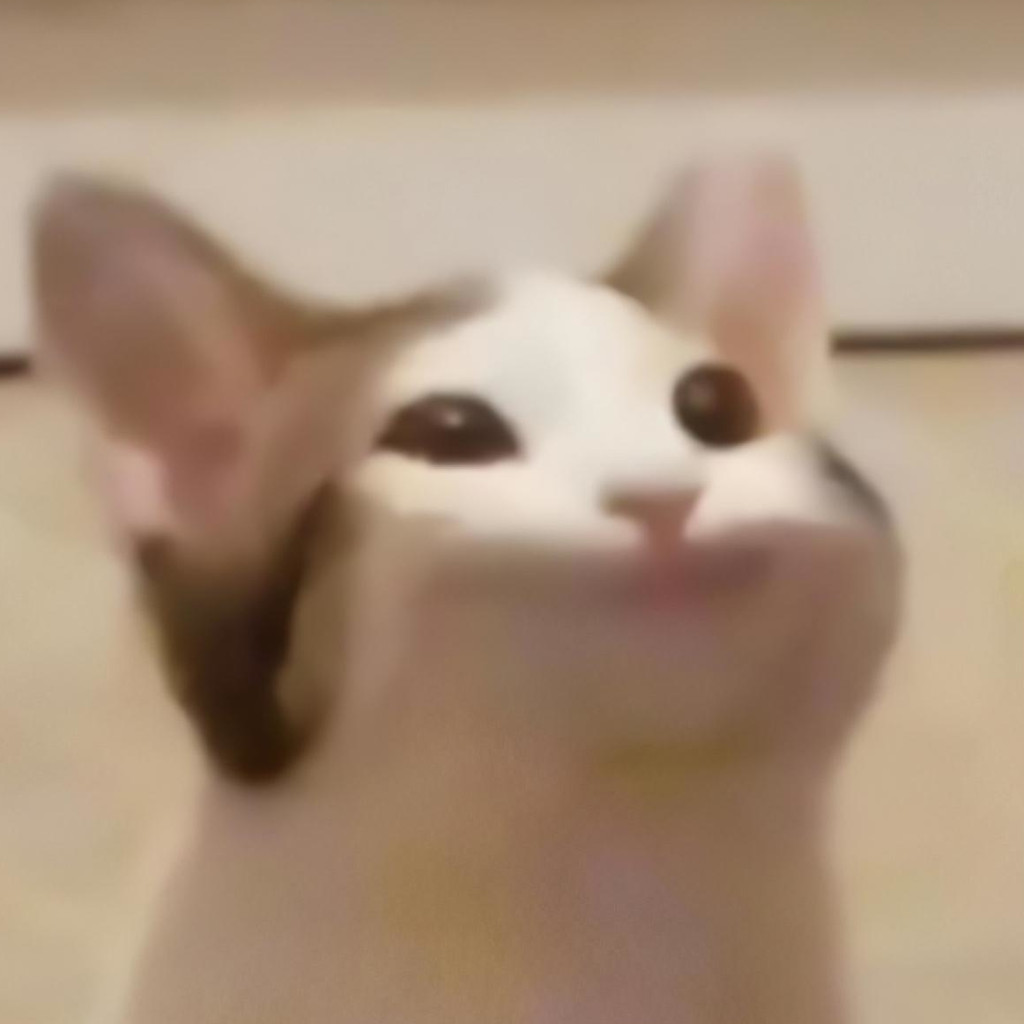

In [22]:
img

In [57]:
img_array = np.array(img)
print(f"{img_array.shape=}")

img_array.shape=(1024, 1024, 3)


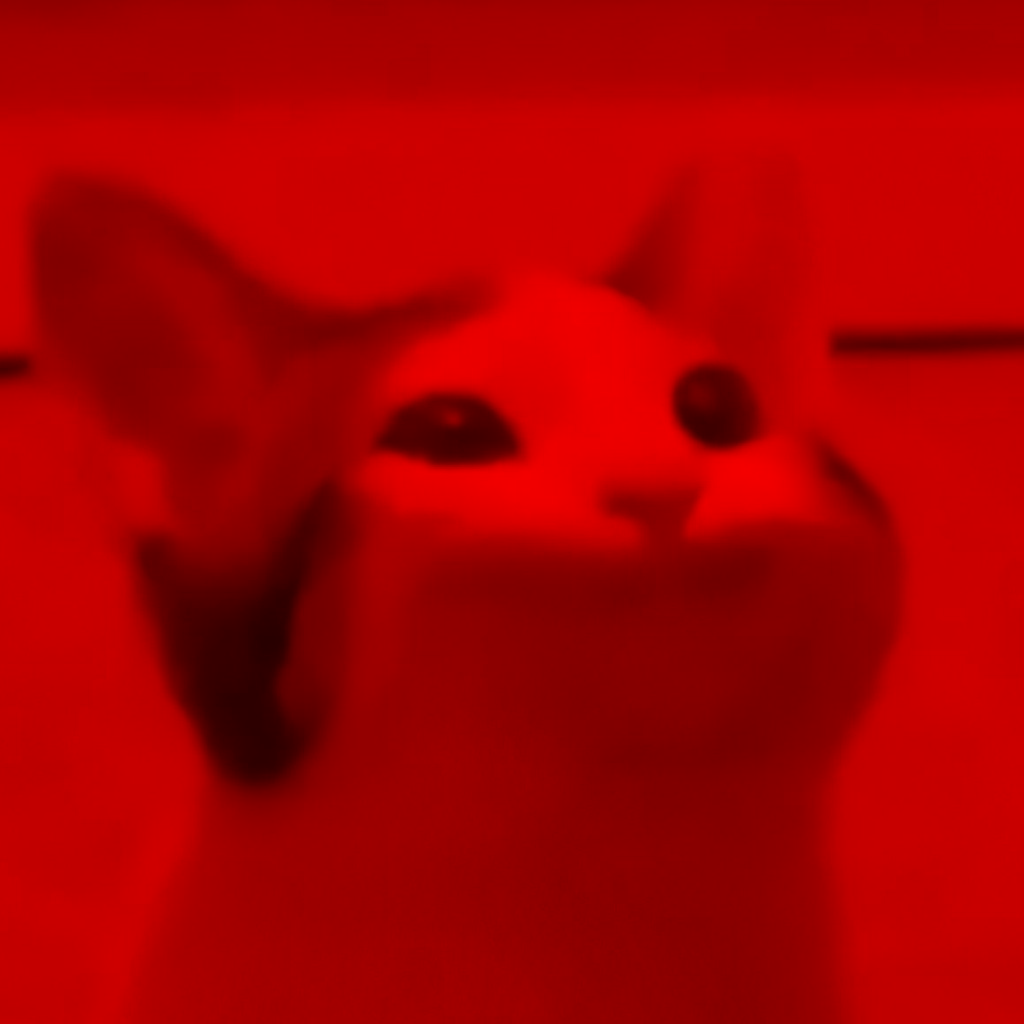

In [58]:
img_array_only_red = img_array.copy()
img_array_only_red[:,:,1:3] = 0
Image.fromarray(img_array_only_red).show()

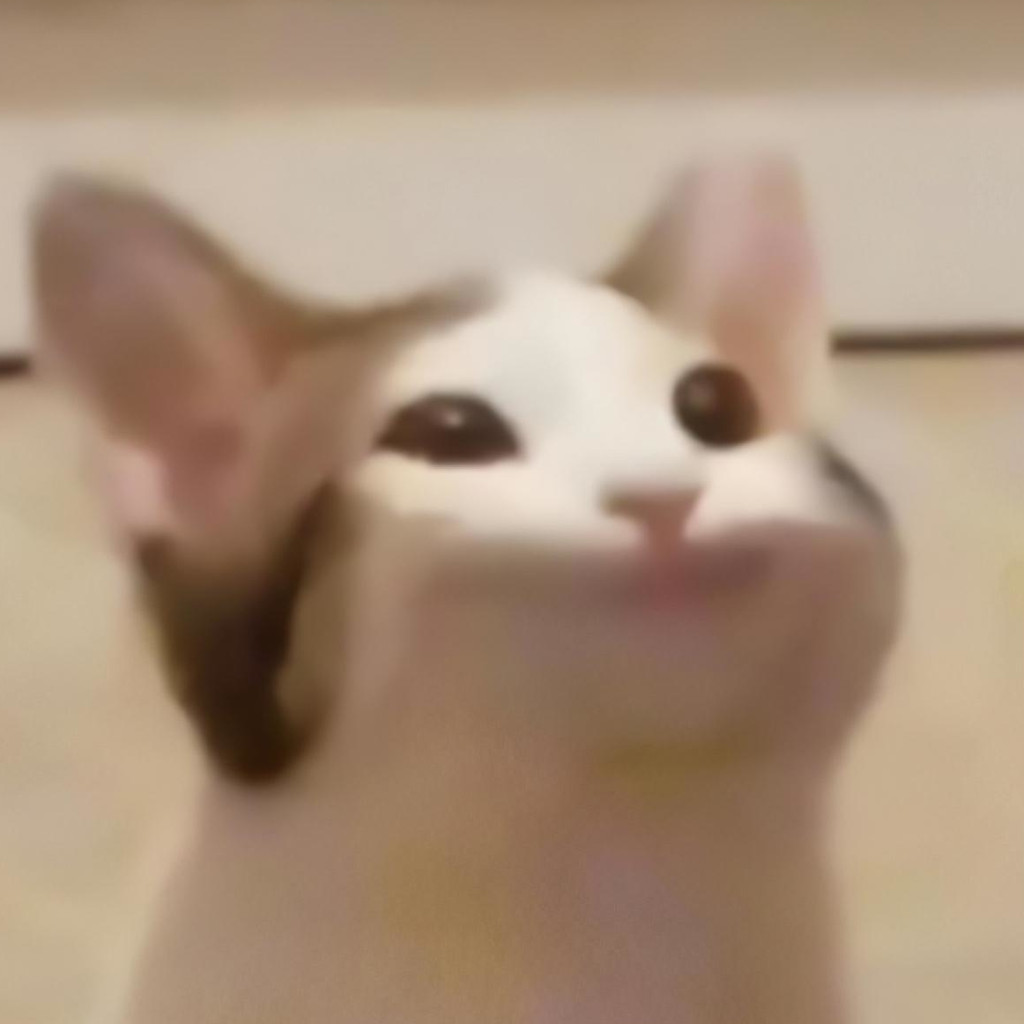

In [59]:
Image.fromarray(img_array)

![img alt](https://camo.githubusercontent.com/627fed630e30ab0e4954aa08ad7c2cb439fae2d2e9d2f69986ba179ad3b2bd2c/68747470733a2f2f70726f636573732e66696c65737461636b6170692e636f6d2f63616368653d6578706972793a6d61782f704156436a63394c53595346596e6b4d3448744b)

# Task 1

I want you to crop the image so that we only see the cat eyes

*Hint: use slicing*

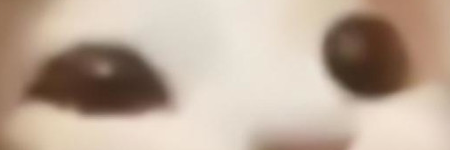

In [61]:
cat_eyes = img_array.copy()
cat_eyes = cat_eyes[350:500,350:800,:]
Image.fromarray(cat_eyes).show()

In [53]:
img_array.shape

(1024, 1024, 3)

# Task 2

I want you to draw the red box over the eye area.

8 bit or 0 - 255

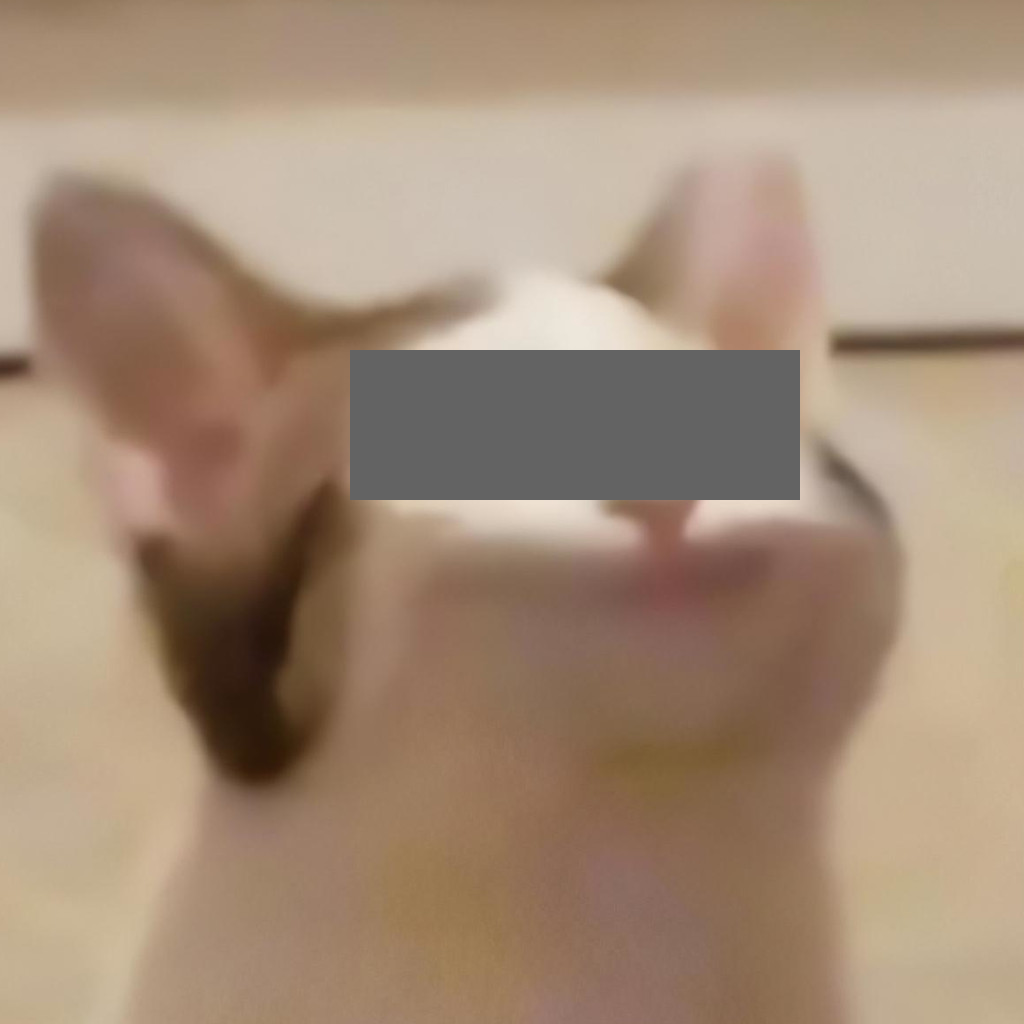

In [81]:
img_array_red_box = img_array.copy()
img_array_red_box[350:500,350:800,[0,1,2]] = 100 + 255
# img_array_red_box[350:500,350:800,] = 255
Image.fromarray(img_array_red_box).show()

## Task 4

Draw a black frame over the eye area

In [116]:
frame = np.ones((5,5))
print(frame)
print()
frame[1:-1] = 0
# area = np.arange(0,25,1).reshape(5,5)
# print(f"{area=}")
print(frame)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]]


(150, 450, 3)


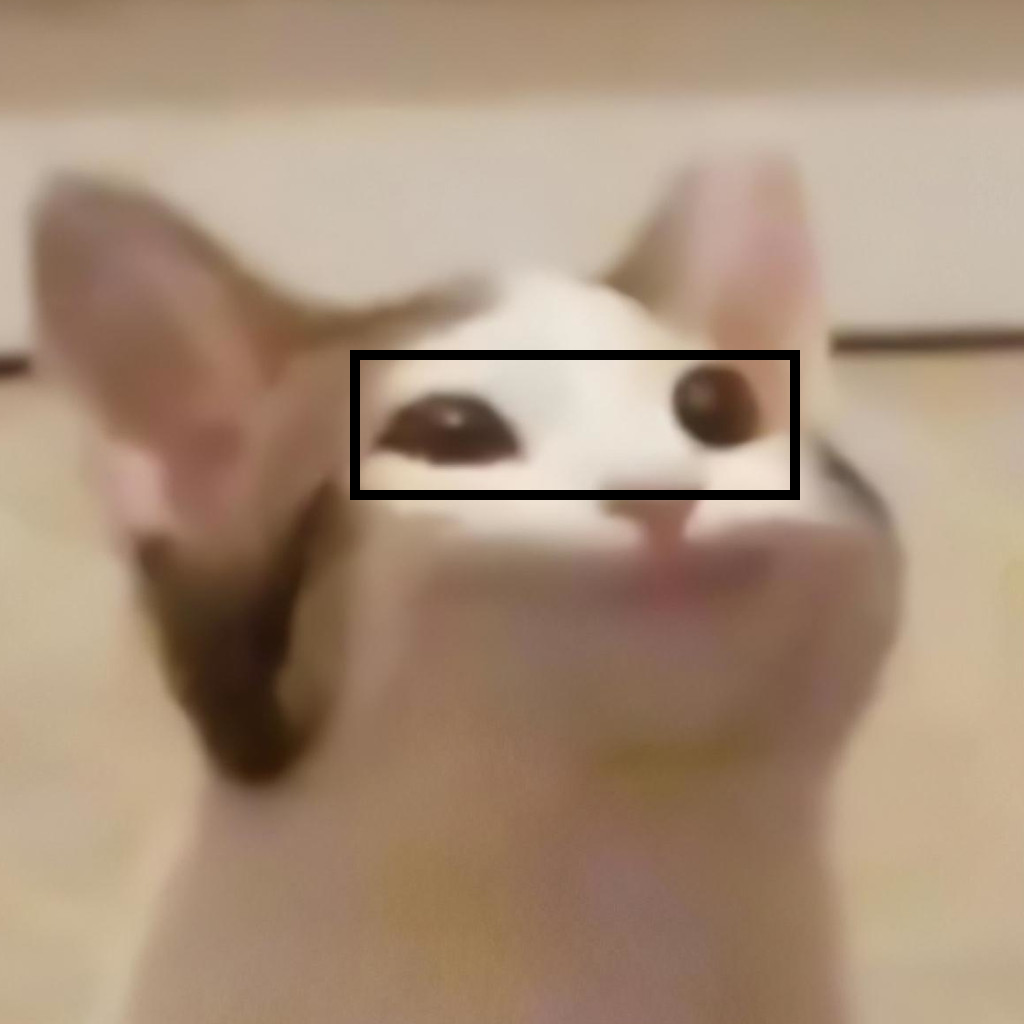

In [124]:
img_with_black_frame = img_array.copy()

select_area = img_with_black_frame[350:500,350:800,:]
print(select_area.shape)
frame = np.zeros(select_area.shape)
frame[10:-10,10:-10,:] = 1
img_with_black_frame[350:500,350:800] = select_area * frame

Image.fromarray(img_with_black_frame).show()

## Task 5

Take a break for 10 minutes
16:42

## Task 6

Rotate the image 90 degree counter clockwise

In [145]:
# Hint 1: Transpose
a = np.arange(0,2*3*4).reshape(2,3,4,1)
print(a.shape, a.T.shape)
# a.T

# Hint 2: .swapaxes
print(np.swapaxes(a, 1, 3 ).shape)
print(a.swapaxes(1,3).shape)

(2, 3, 4, 1) (1, 4, 3, 2)
(2, 1, 4, 3)
(2, 1, 4, 3)


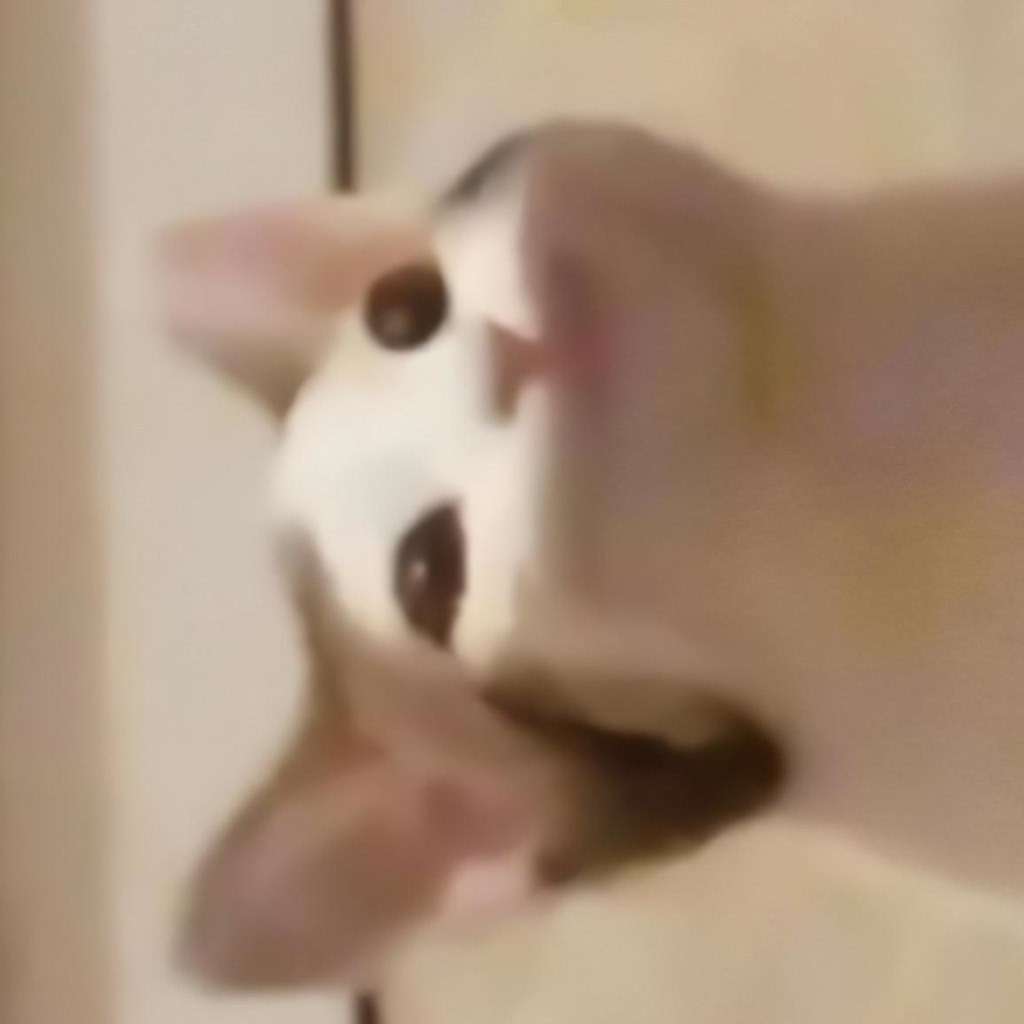

In [153]:
img_array_rotate_90 = img_array.copy()
img_array_rotate_90 = img_array_rotate_90.swapaxes(0,1)
img_array_rotate_90 = np.flip(img_array_rotate_90, 0)
Image.fromarray(img_array_rotate_90).show()
# Task 6.5
# flip

# Task 7
Rotate to 180
and
Rotate to 270 counter clockwise.

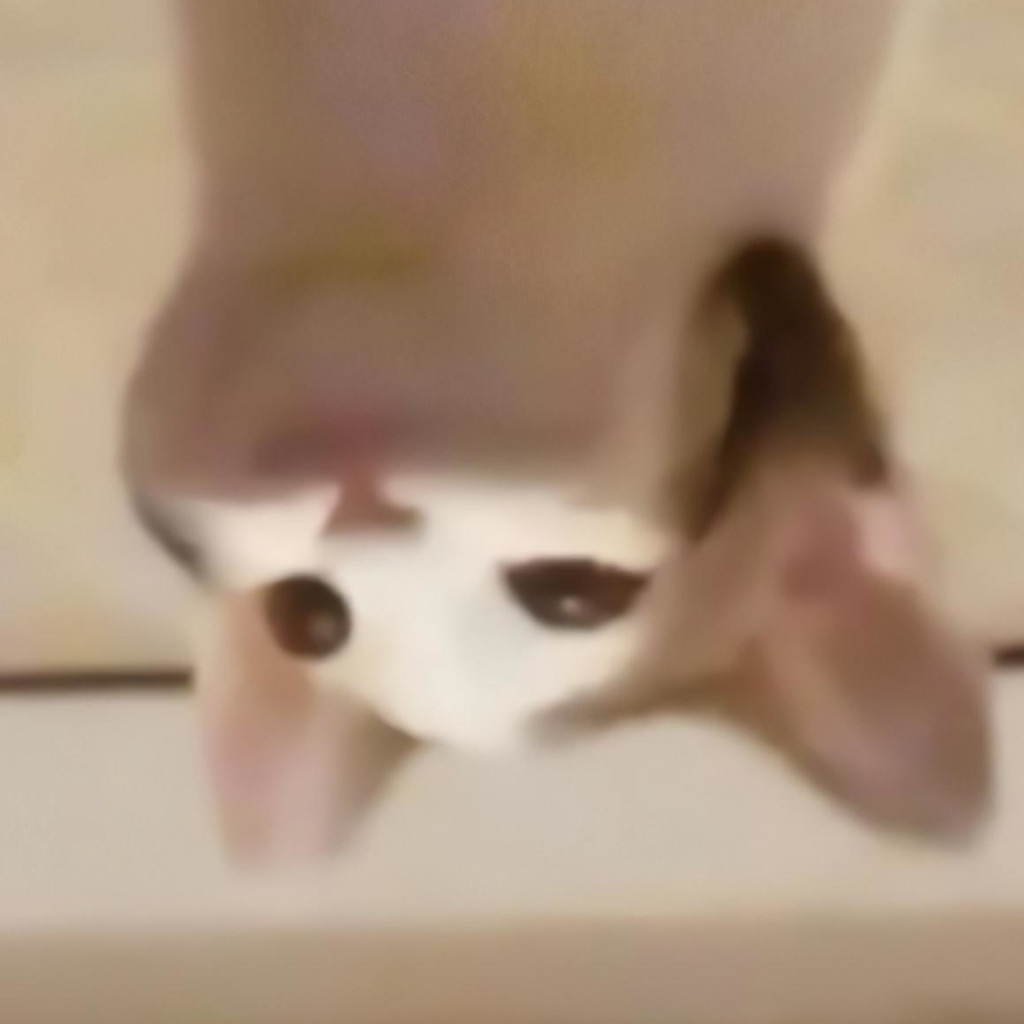

In [166]:
# Rotate 180
img_array_rotate_180 = img_array.copy()
img_array_rotate_180 = np.flip(img_array_rotate_180, 0)
img_array_rotate_180 = np.flip(img_array_rotate_180, 1)
Image.fromarray(img_array_rotate_180).show()

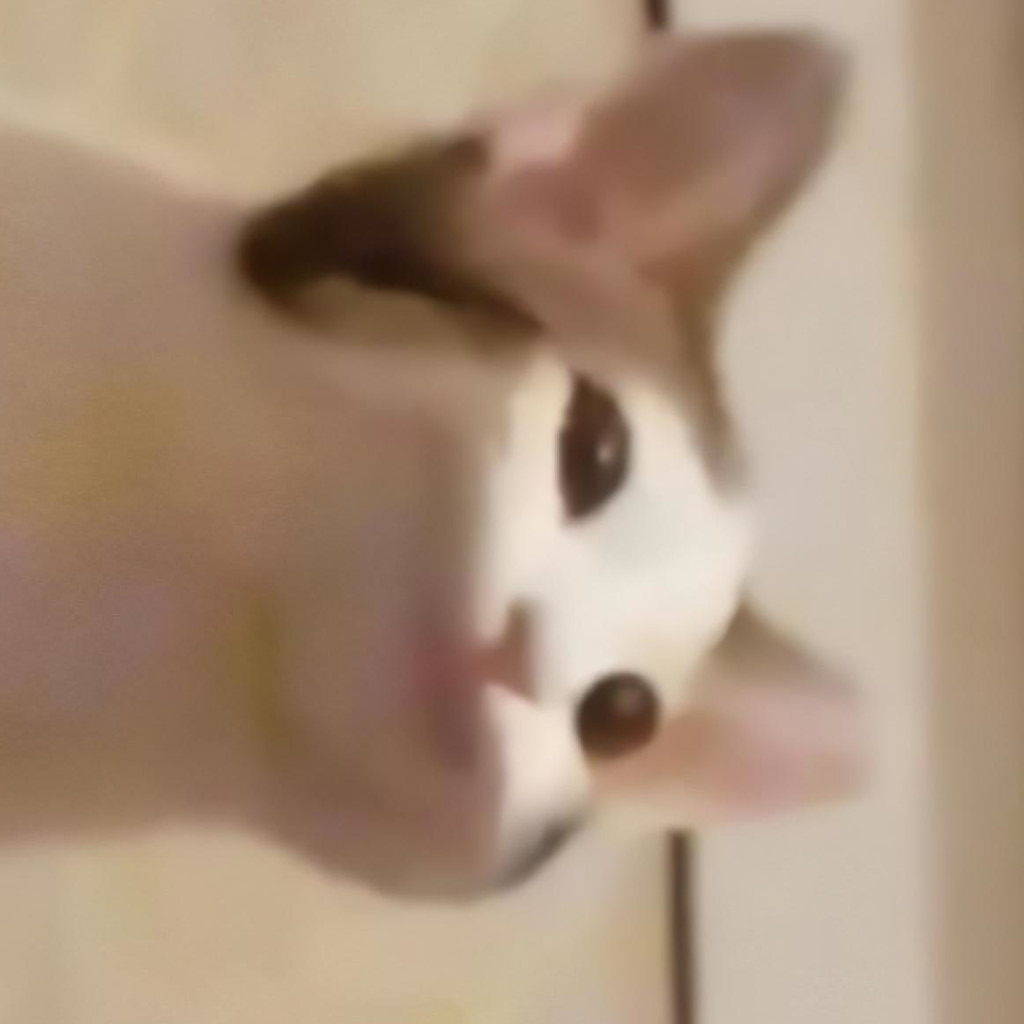

In [170]:
# Rotate 270
img_array_rotate_270 = img_array.copy()
img_array_rotate_270 = np.flip(img_array_rotate_270, 0)
img_array_rotate_270 = img_array_rotate_270.swapaxes(0,1)
Image.fromarray(img_array_rotate_270).show()

# Task 8

Make a GIF out of the rotated images

series of images => list of images

4 frames

images = [original, 90 degree, 180 degree, 270 degree]

images[0].save('./cat.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

In [182]:
images = []
images.append(Image.fromarray(img_array))
images.append(Image.fromarray(img_array_rotate_90))
images.append(Image.fromarray(img_array_rotate_180))
images.append(Image.fromarray(img_array_rotate_270))

images
images[0].save('./cat.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)
# Image.fromarray(img_array_rotate_270)

## Task 9

is to build 4d array such that the first dimension is `n_samples` => number_of_samples

*Hint: numpy.concatenate and numpy.expand_dims*

In [184]:
img_array.shape, img_array_only_red.shape

# dataset.shape => (4, 1024,1024,3)

# (n_samples, height, width, channels)

((1024, 1024, 3), (1024, 1024, 3))

In [228]:
a = np.arange(0,10)
a = np.expand_dims(a, axis=0)
b = np.arange(10,20)
b = np.expand_dims(b, axis=0)
print(a.shape,b.shape)
# dataset.shape => (2, 10)
dataset = np.concatenate([a,b])
print(dataset.shape)
# print(a)
# a.reshape(1,-1)



(1, 10) (1, 10)
(2, 10)


In [236]:
images = []
images.append(np.expand_dims(img_array, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
dataset = np.concatenate(images, axis=0)
print(dataset.shape)

(4, 1024, 1024, 3)


In [240]:
np.vstack(images).shape

(4, 1024, 1024, 3)